In [1]:
import os
from facenet_pytorch import MTCNN
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

/home/ronak/miniconda3/envs/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Crops and saves bizos photos

In [2]:
# Folder containing images
data_path = "data/raw/bizos_export"

# Initialize MTCNN with post_process=False
mtcnn = MTCNN(image_size=160, margin=10, post_process=False)

# Process each image in the folder
for file_name in os.listdir(data_path):
    # Full path of the image
    image_path = os.path.join(data_path, file_name)

    # Skip non-image files
    if not file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    try:
        # Load the original image
        original_image = Image.open(image_path).convert("RGB")

        # Detect and crop the face
        face = mtcnn(original_image)

        if face is None:
            print(f"No face detected in {file_name}. Skipping.")
            continue

        # Convert the face tensor to a NumPy array for visualization
        face_np = face.permute(1, 2, 0).numpy()  # Convert from CHW to HWC
        face_display = np.clip(face_np, 0, 255).astype("uint8")  # Scale to [0, 255]

        # Convert to PIL Image for resizing
        cropped_face_image = Image.fromarray(face_display).resize((160, 160))

        # Save the cropped and resized face image back to the original path
        cropped_face_image.save(image_path)  # Overwrites the original image
        print(f"Processed and saved: {image_path}")

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

Processed and saved: /home/ronak/ai_final_project/data/raw/bizos_export/Namuna Paudel.jpg
Processed and saved: /home/ronak/ai_final_project/data/raw/bizos_export/Human Singh Hitang.jpg
Processed and saved: /home/ronak/ai_final_project/data/raw/bizos_export/Nitin Tandukar.jpg
Processed and saved: /home/ronak/ai_final_project/data/raw/bizos_export/Bitisha Maharjan.jpg
Processed and saved: /home/ronak/ai_final_project/data/raw/bizos_export/Sardul Ojha.jpg
Processed and saved: /home/ronak/ai_final_project/data/raw/bizos_export/Wonika Bhatta.jpg
Processed and saved: /home/ronak/ai_final_project/data/raw/bizos_export/Arbin Gurung.jpg
Processed and saved: /home/ronak/ai_final_project/data/raw/bizos_export/Roshan Khadka.jpg
Processed and saved: /home/ronak/ai_final_project/data/raw/bizos_export/Krish.jpg
Processed and saved: /home/ronak/ai_final_project/data/raw/bizos_export/Sushmita Khadka.jpg
Processed and saved: /home/ronak/ai_final_project/data/raw/bizos_export/Sapana Chhetri.jpg
Processed

# MTCNN cropping test

Face tensor shape: torch.Size([3, 160, 160])


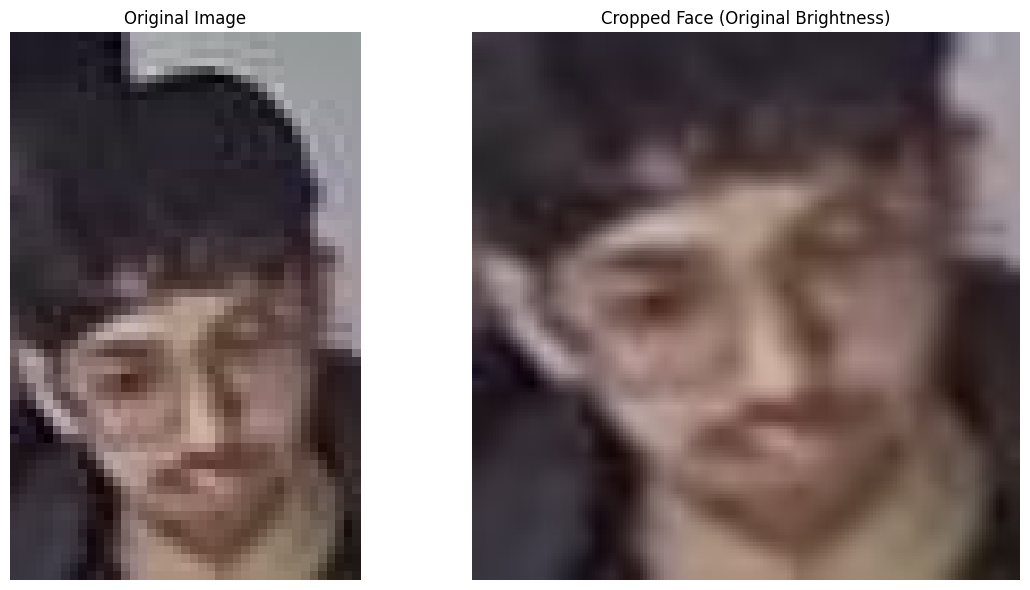

In [ ]:
# Load the original image
image_path = 'data/processed/final_data/final_data/krish/krish_1_2.jpg'

original_image = Image.open(image_path).convert("RGB")

# Initialize MTCNN with post_process=False
mtcnn = MTCNN(image_size=160, margin=60, post_process=False) # change margin for zoom in and out

# Detect and crop the face
face = mtcnn(original_image)

if face is None:
    print("No face detected by MTCNN.")
else:
    print(f"Face tensor shape: {face.shape}")

    # Convert the face tensor to a NumPy array for visualization
    face_np = face.permute(1, 2, 0).numpy()  # Convert from CHW to HWC
    face_display = np.clip(face_np, 0, 255).astype("uint8")  # Scale to [0, 255]

    # Plot original and processed images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Original image
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Cropped face
    axes[1].imshow(face_display)
    axes[1].set_title("Cropped Face (Original Brightness)")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

    # Save the cropped face image to disk
    cropped_face_image = Image.fromarray(face_display)


# Auto mctnn cropping and saving

In [11]:
import os
from PIL import Image
from facenet_pytorch import MTCNN
import numpy as np
import torch

input_dir = "data/raw/Entry_Only_Data"
output_dir = "data/raw/entry_cropped"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Initialize MTCNN
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mtcnn = MTCNN(image_size=160, margin=60, post_process=False, device=device)

# Iterate through person folders
for person in os.listdir(input_dir):
    person_path = os.path.join(input_dir, person)

    if os.path.isdir(person_path):  # Ensure it's a directory
        output_person_dir = os.path.join(output_dir, person)
        os.makedirs(output_person_dir, exist_ok=True)  # Create person's folder

        # Iterate through images in the person's folder
        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)

            try:
                # Load image
                img = Image.open(image_path).convert("RGB")

                # Detect face
                face = mtcnn(img)

                if face is not None:
                    # Convert tensor to image
                    face_np = face.permute(1, 2, 0).numpy()
                    face_display = np.clip(face_np, 0, 255).astype("uint8")
                    cropped_face = Image.fromarray(face_display)

                    # Save cropped face
                    output_image_path = os.path.join(output_person_dir, image_name)
                    cropped_face.save(output_image_path)
                    print(f"Saved cropped face: {output_image_path}")

                else:
                    print(f"No face detected in: {image_path}")

            except Exception as e:
                print(f"Error processing {image_path}: {e}")

print(" Face cropping completed for all images.")


Saved cropped face: /home/ronak/ai_final_project/data/raw/entry_cropped/nitin/personID58_frame1816.jpg
Saved cropped face: /home/ronak/ai_final_project/data/raw/entry_cropped/nitin/personID58_frame1822.jpg
Saved cropped face: /home/ronak/ai_final_project/data/raw/entry_cropped/nitin/personID57_frame1756.jpg
Saved cropped face: /home/ronak/ai_final_project/data/raw/entry_cropped/nitin/personID58_frame1778.jpg
Saved cropped face: /home/ronak/ai_final_project/data/raw/entry_cropped/nitin/personID58_frame1772.jpg
Saved cropped face: /home/ronak/ai_final_project/data/raw/entry_cropped/nitin/personID58_frame1834.jpg
Saved cropped face: /home/ronak/ai_final_project/data/raw/entry_cropped/nitin/personID58_frame1786.jpg
Saved cropped face: /home/ronak/ai_final_project/data/raw/entry_cropped/nitin/personID58_frame1810.jpg
Saved cropped face: /home/ronak/ai_final_project/data/raw/entry_cropped/nitin/personID58_frame1806.jpg
Saved cropped face: /home/ronak/ai_final_project/data/raw/entry_cropped/n

# classifies into face and no face and saves in a folder

In [20]:
import shutil

# Define paths
input_path = 'data/raw/aayush_filter/aayush'
output_path = 'data/processed/filter_face/aayush_mtcnn'
face_true_path = os.path.join(output_path, 'face_true')
face_false_path = os.path.join(output_path, 'face_false')

# Create directories for classification
os.makedirs(face_true_path, exist_ok=True)
os.makedirs(face_false_path, exist_ok=True)

# Initialize MTCNN
mtcnn = MTCNN(keep_all=False, post_process=False)

# Counters for face classification
face_true_count = 0
face_false_count = 0

# Iterate through all files in the input directory
for filename in os.listdir(input_path):
    file_path = os.path.join(input_path, filename)
    try:
        # Open image
        image = Image.open(file_path).convert("RGB")
        
        # Detect face
        face = mtcnn(image)

        if face is not None:
            # If a face is detected, copy to face_true directory
            shutil.copy(file_path, os.path.join(face_true_path, filename))
            face_true_count += 1
            print(f"Face detected: {filename} -> face_true")
        else:
            # If no face is detected, copy to face_false directory
            shutil.copy(file_path, os.path.join(face_false_path, filename))
            face_false_count += 1
            print(f"No face detected: {filename} -> face_false")

    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Calculate the ratio
total_images = face_true_count + face_false_count
if total_images > 0:
    face_ratio = face_true_count / total_images
    no_face_ratio = face_false_count / total_images
else:
    face_ratio = no_face_ratio = 0

# Print summary
print("\n--- Classification Summary ---")
print(f"Total images processed: {total_images}")
print(f"Images with faces: {face_true_count}")
print(f"Images without faces: {face_false_count}")
print(f"Face-to-No-Face Ratio: {face_ratio:.2f} : {no_face_ratio:.2f}")


Face detected: person_ID_18_frame552.jpg -> face_true
No face detected: person_ID_16_frame456.jpg -> face_false
No face detected: person_ID_16_frame288.jpg -> face_false
No face detected: person_ID_16_frame294.jpg -> face_false
No face detected: person_ID_87_frame1638.jpg -> face_false
No face detected: person_ID_17_frame450.jpg -> face_false
Face detected: person_ID_56_frame930.jpg -> face_true
No face detected: person_ID_18_frame360.jpg -> face_false
No face detected: person_ID_62_frame1092.jpg -> face_false
No face detected: person_ID_16_frame486.jpg -> face_false
No face detected: person_ID_1_frame24.jpg -> face_false
No face detected: person_ID_85_frame1404.jpg -> face_false
Face detected: person_ID_47_frame744.jpg -> face_true
No face detected: person_ID_80_frame1464.jpg -> face_false
No face detected: person_ID_89_frame1662.jpg -> face_false
Face detected: person_ID_23_frame552.jpg -> face_true
No face detected: person_ID_80_frame1434.jpg -> face_false
Face detected: person_ID_8

# moves persons by id into seperate folders

In [ ]:
import os
import shutil

# Define the path where classified images are stored
face_true_path = 'data/processed/filter_face/ylcrface4/face_true'
output_base_path = 'data/processed/filter_face/ylcrface6'

# Iterate over all images in the face_true directory
for filename in os.listdir(face_true_path):
    if filename.startswith("person_ID_"):  # Ensure the file matches the naming pattern
        # Extract the person ID from the filename (e.g., "person_ID_1")
        person_id = filename.split("_frame")[0]  # This will extract "person_ID_1"

        # Create a new directory for the person if it doesn't exist
        person_folder_path = os.path.join(output_base_path, person_id)
        os.makedirs(person_folder_path, exist_ok=True)

        # Move the image into the corresponding folder
        source_path = os.path.join(face_true_path, filename)
        destination_path = os.path.join(person_folder_path, filename)
        shutil.move(source_path, destination_path)
        print(f"Moved {filename} to {person_folder_path}")

print("All images have been organized into person-specific folders.")


Moved person_ID_81_frame1284.jpg to /home/ronak/ai_final_project/data/processed/filter_face/ylcrface6/person_ID_81
Moved person_ID_219_frame3660.jpg to /home/ronak/ai_final_project/data/processed/filter_face/ylcrface6/person_ID_219
Moved person_ID_69_frame1296.jpg to /home/ronak/ai_final_project/data/processed/filter_face/ylcrface6/person_ID_69
Moved person_ID_69_frame1386.jpg to /home/ronak/ai_final_project/data/processed/filter_face/ylcrface6/person_ID_69
Moved person_ID_150_frame3330.jpg to /home/ronak/ai_final_project/data/processed/filter_face/ylcrface6/person_ID_150
Moved person_ID_30_frame1974.jpg to /home/ronak/ai_final_project/data/processed/filter_face/ylcrface6/person_ID_30
Moved person_ID_222_frame3714.jpg to /home/ronak/ai_final_project/data/processed/filter_face/ylcrface6/person_ID_222
Moved person_ID_56_frame798.jpg to /home/ronak/ai_final_project/data/processed/filter_face/ylcrface6/person_ID_56
Moved person_ID_152_frame2868.jpg to /home/ronak/ai_final_project/data/proc

# Automate consistent naming for data preparation


In [10]:
import shutil

def consolidate_folders(base_path):
    # List all items in the base directory
    items = os.listdir(base_path)
    
    # Dictionary to map person names to their consolidated folders
    person_folders = {}
    
    for item in items:
        item_path = os.path.join(base_path, item)
        
        # Process only directories with names like "ronak4" or "sardul6"
        if os.path.isdir(item_path) and any(char.isdigit() for char in item):
            # Extract the person's name (everything before the first digit)
            person_name = ''.join(filter(str.isalpha, item))
            
            # Create a consolidated folder if it doesn't exist
            person_folder = os.path.join(base_path, person_name)
            if person_name not in person_folders:
                os.makedirs(person_folder, exist_ok=True)
                person_folders[person_name] = person_folder
            
            # Move all files from the current folder to the consolidated folder
            for file_name in os.listdir(item_path):
                source_file = os.path.join(item_path, file_name)
                if os.path.isfile(source_file):
                    shutil.move(source_file, person_folder)
            
            # Remove the now-empty folder
            os.rmdir(item_path)

    print("Consolidation complete!")

# Replace with the path to your base directory
base_directory = "data/raw/Entry_Only_Data"
consolidate_folders(base_directory)

Consolidation complete!


# name change of the files with name of the person

In [23]:
import os

def rename_files_in_folders(base_path):
    # List all subfolders in the base directory
    subfolders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]

    for subfolder in subfolders:
        subfolder_path = os.path.join(base_path, subfolder)
        files = os.listdir(subfolder_path)
        
        # Iterate through files and rename them
        for index, file_name in enumerate(files, start=1):
            file_path = os.path.join(subfolder_path, file_name)
            if os.path.isfile(file_path):
                # Extract the file extension
                file_extension = os.path.splitext(file_name)[1]
                # Construct the new file name, preserving the extension
                new_name = f"{subfolder}_2_{index}{file_extension}"
                new_file_path = os.path.join(subfolder_path, new_name)
                # Rename the file
                os.rename(file_path, new_file_path)
                print(f"Renamed: {file_path} -> {new_file_path}")

    print("File renaming complete!")

# Replace with the path to your base directory
base_directory = "data/processed/ylcrfa3/ylcrfa3"
rename_files_in_folders(base_directory)


Renamed: /home/ronak/ai_final_project/data/processed/ylcrfa3/ylcrfa3/abhisek/person_ID_67_frame3150.jpg -> /home/ronak/ai_final_project/data/processed/ylcrfa3/ylcrfa3/abhisek/abhisek_2_1.jpg
Renamed: /home/ronak/ai_final_project/data/processed/ylcrfa3/ylcrfa3/abhisek/person_ID_409_frame6414.jpg:Zone.Identifier -> /home/ronak/ai_final_project/data/processed/ylcrfa3/ylcrfa3/abhisek/abhisek_2_2.Identifier
Renamed: /home/ronak/ai_final_project/data/processed/ylcrfa3/ylcrfa3/abhisek/person_ID_12_frame378.jpg -> /home/ronak/ai_final_project/data/processed/ylcrfa3/ylcrfa3/abhisek/abhisek_2_3.jpg
Renamed: /home/ronak/ai_final_project/data/processed/ylcrfa3/ylcrfa3/abhisek/person_ID_67_frame2880.jpg:Zone.Identifier -> /home/ronak/ai_final_project/data/processed/ylcrfa3/ylcrfa3/abhisek/abhisek_2_4.Identifier
Renamed: /home/ronak/ai_final_project/data/processed/ylcrfa3/ylcrfa3/abhisek/person_ID_67_frame2796.jpg -> /home/ronak/ai_final_project/data/processed/ylcrfa3/ylcrfa3/abhisek/abhisek_2_5.jpg

# Rename files automatically by manually renamed folder

In [5]:
import os

# Define the base path where person folders are located
base_path = 'data/processed/filter_face'

# List of person names (folder names)
person_names = ['aayush', 'amrit', 'ronak', 'yubraj', 'sardul']

# Dictionary to store the count of images for each person
person_image_counts = {}

# Iterate through each person's folder
for person in person_names:
    person_folder_path = os.path.join(base_path, person)
    
    if not os.path.exists(person_folder_path):
        print(f"Folder not found: {person_folder_path}")
        continue

    # Get a list of image files in the person's folder
    image_files = sorted(os.listdir(person_folder_path))
    
    # Counter for renaming
    count = 1
    
    for image_file in image_files:
        # Construct the old and new file paths
        old_file_path = os.path.join(person_folder_path, image_file)
        new_file_name = f"{person}_{count}.jpg"
        new_file_path = os.path.join(person_folder_path, new_file_name)
        
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed: {old_file_path} -> {new_file_path}")
        
        # Increment the counter
        count += 1

    # Store the number of images in this folder
    person_image_counts[person] = count - 1

# Print the summary of counts
print("\n--- Image Counts ---")
for person, count in person_image_counts.items():
    print(f"{person}: {count} images")


Renamed: /home/ronak/ai_final_project/data/processed/filter_face/aayush/aayush_1.jpg -> /home/ronak/ai_final_project/data/processed/filter_face/aayush/aayush_1.jpg
Renamed: /home/ronak/ai_final_project/data/processed/filter_face/aayush/aayush_10.jpg -> /home/ronak/ai_final_project/data/processed/filter_face/aayush/aayush_2.jpg
Renamed: /home/ronak/ai_final_project/data/processed/filter_face/aayush/aayush_11.jpg -> /home/ronak/ai_final_project/data/processed/filter_face/aayush/aayush_3.jpg
Renamed: /home/ronak/ai_final_project/data/processed/filter_face/aayush/aayush_2.jpg -> /home/ronak/ai_final_project/data/processed/filter_face/aayush/aayush_4.jpg
Renamed: /home/ronak/ai_final_project/data/processed/filter_face/aayush/aayush_3.jpg -> /home/ronak/ai_final_project/data/processed/filter_face/aayush/aayush_5.jpg
Renamed: /home/ronak/ai_final_project/data/processed/filter_face/aayush/aayush_4.jpg -> /home/ronak/ai_final_project/data/processed/filter_face/aayush/aayush_6.jpg
Renamed: /home

# Using  to resize to 70,70 size

In [48]:
from torchvision.transforms import Resize, ToTensor, ToPILImage
from PIL import Image, UnidentifiedImageError
import os

# Define paths
base_path = 'data/processed/filter_face'
output_base_path = 'data/processed/resized_faces'
os.makedirs(output_base_path, exist_ok=True)

# Torchvision resizing transformation
resize_transform = Resize((70, 70))

# Iterate through each person's folder
for person in os.listdir(base_path):
    person_folder_path = os.path.join(base_path, person)
    output_person_folder = os.path.join(output_base_path, person)
    os.makedirs(output_person_folder, exist_ok=True)

    for image_file in os.listdir(person_folder_path):
        image_path = os.path.join(person_folder_path, image_file)
        try:
            # Open the image and convert it to RGB
            image = Image.open(image_path).convert("RGB")
            
            # Resize using torchvision
            resized_image = resize_transform(ToPILImage()(ToTensor()(image)))
            resized_image.save(os.path.join(output_person_folder, image_file))
        
        except UnidentifiedImageError:
            print(f"Skipping corrupt or unreadable image: {image_path}")
        except Exception as e:
            print(f"An unexpected error occurred with {image_path}: {e}")

print("Resizing with Torchvision completed.")


Skipping corrupt or unreadable image: /home/ronak/ai_final_project/data/processed/filter_face/sardul/sardul_34.jpg
Skipping corrupt or unreadable image: /home/ronak/ai_final_project/data/processed/filter_face/sardul/sardul_2.jpg
Skipping corrupt or unreadable image: /home/ronak/ai_final_project/data/processed/filter_face/sardul/sardul_10.jpg
Skipping corrupt or unreadable image: /home/ronak/ai_final_project/data/processed/filter_face/sardul/sardul_22.jpg
Skipping corrupt or unreadable image: /home/ronak/ai_final_project/data/processed/filter_face/sardul/sardul_32.jpg
Skipping corrupt or unreadable image: /home/ronak/ai_final_project/data/processed/filter_face/sardul/sardul_20.jpg
Skipping corrupt or unreadable image: /home/ronak/ai_final_project/data/processed/filter_face/sardul/sardul_36.jpg
Skipping corrupt or unreadable image: /home/ronak/ai_final_project/data/processed/filter_face/sardul/sardul_4.jpg
Skipping corrupt or unreadable image: /home/ronak/ai_final_project/data/processed/


aayush: 83 images
amrit: 457 images
ronak: 84 images
yuraj: 588 images
sardul: 363 images

# same number of image in each folder

In [51]:
input_base_path = 'data/processed/resized_faces'
output_base_path = 'data/processed/final_faces'
os.makedirs(output_base_path, exist_ok=True)

# Initialize MTCNN for face detection
mtcnn = MTCNN(keep_all=False)  # Keep_all=False ensures we only get one face per image

def filter_faces(folder_path):
    """Filter images with faces using MTCNN and return (image_path, confidence_score)."""
    face_images = []
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            # Open image
            image = Image.open(image_path).convert("RGB")
            
            # Detect face with MTCNN
            face, confidence = mtcnn(image, return_prob=True)  # Get face and confidence score
            if face is not None:  # If a face is detected
                # Handle both float and tensor confidence scores
                confidence_score = confidence if isinstance(confidence, float) else confidence.item()
                face_images.append((image_path, confidence_score))  # Append path and score
        except UnidentifiedImageError:
            print(f"Skipping unreadable image: {image_path}")
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")
    return face_images

# Step 1: Filter faces for each person and calculate the number of valid images
person_face_data = {}
for person in os.listdir(input_base_path):
    person_folder = os.path.join(input_base_path, person)
    filtered_faces = filter_faces(person_folder)
    person_face_data[person] = filtered_faces

# Step 2: Find the minimum number of images across all persons
min_images = min(len(data) for data in person_face_data.values()) if person_face_data else 0
print(f"Minimum number of images across all folders: {min_images}")

# Step 3: Create balanced folders with top `min_images` images based on confidence score
for person, face_data in person_face_data.items():
    if face_data:
        # Sort images by confidence score (descending) and pick the top `min_images`
        face_data = sorted(face_data, key=lambda x: x[1], reverse=True)[:min_images]

        # Create output folder for the person
        output_folder = os.path.join(output_base_path, person)
        os.makedirs(output_folder, exist_ok=True)

        # Copy selected images to the new folder
        for idx, (image_path, confidence) in enumerate(face_data):
            new_image_name = f"{person}_{idx + 1}.jpg"  # Rename the images
            shutil.copy(image_path, os.path.join(output_folder, new_image_name))

print("Face filtering and equalization of images completed.")

# Step 4: Count and print the number of images in each final folder
for person in os.listdir(output_base_path):
    person_folder = os.path.join(output_base_path, person)
    num_images = len(os.listdir(person_folder))
    print(f"{person}: {num_images} images")

Minimum number of images across all folders: 39
Face filtering and equalization of images completed.
sardul: 39 images
ronak: 39 images
amrit: 39 images
yuraj: 39 images
aayush: 39 images
